<a href="https://colab.research.google.com/github/anonymousboy67/AIAgentWithMCPServer/blob/main/Week_5_ASSIGNMENT_Aashish_ADHIKARI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 3: Regression Activity 5: Predicting Population**

**Aashish Adhikari**

Step 1: Create the data

In [2]:
import numpy as np
import matplotlib.pyplot as plt


x = np.array(range(1, 19))
y = np.array([147026, 144272, 140020, 143801, 146233, 144539,
              141273, 135389, 142500, 139452, 139722, 135300,
              137289, 136511, 132884, 125683, 127255, 124275])

Step 2: Linear regression

In [3]:
a,b =np.polyfit(x,y,1)
print(a,b)

-1142.0557275541844 148817.52941176473


Step 3: Plot

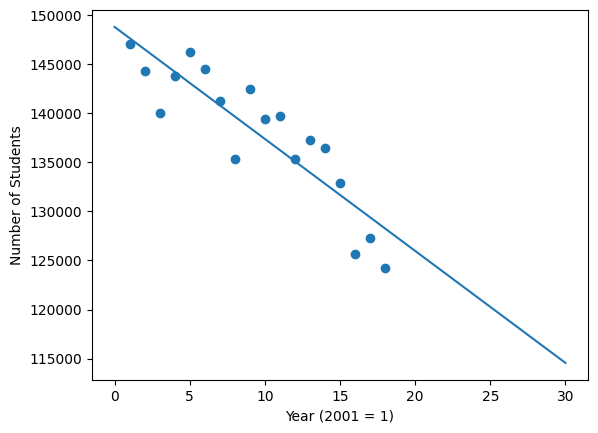

In [5]:
plt.scatter(x, y)
plt.plot([0, 30], [b, 30*a + b])
plt.xlabel("Year (2001 = 1)")
plt.ylabel("Number of Students")
plt.show()


Using linear regression on enrollment data from 2001 to 2018, we observed a downward trend in the number of elementary school students. The regression model shows a decrease of approximately 1,142 students per year. Based on this model, the predicted enrollment for the year 2025 is approximately 120,000 students and for 2030 is approximately 114,000 students.

**Exercise 10: Loading Datasets**

In [86]:
from google.colab import files

uploaded = files.upload()


Saving statlog+german+credit+data.zip to statlog+german+credit+data (1).zip


In [88]:
import os
os.listdir()


['.config',
 'statlog+german+credit+data (1).zip',
 'statlog+german+credit+data.zip',
 'sample_data']

In [90]:
import zipfile

with zipfile.ZipFile('statlog+german+credit+data.zip', 'r') as zip_ref:
    zip_ref.extractall()


In [91]:
import os
os.listdir()


['.config',
 'Index',
 'german.data-numeric',
 'statlog+german+credit+data (1).zip',
 'statlog+german+credit+data.zip',
 'german.data',
 'german.doc',
 'sample_data']

In [105]:
import pandas as pd

df = pd.read_csv('german.data', sep=' ', header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [108]:
columns = [
    'status', 'duration', 'credit_history', 'purpose', 'credit_amount',
    'savings', 'employment_duration', 'installment_rate', 'personal_status',
    'other_debtors', 'present_residence', 'property', 'age',
    'other_installment_plans', 'housing', 'existing_credits',
    'job', 'num_dependents', 'telephone', 'foreign_worker', 'target'
]

df.columns = columns


**Exercise 11: Pre-Processing Data**

**Replace NA values**

In [106]:
df.replace('NA', -1000000, inplace=True)
df.replace('N/A', -1000000, inplace=True)

Binarization example


In [109]:
len(df.columns)



21

In [110]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=1000)
df['credit_amount_bin'] = binarizer.fit_transform(df[['credit_amount']])


In [111]:
len(df.columns)


22

**Exercise 12: Illustrating the K-nearest Neighbor Classifier Algorithm**

In [112]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [113]:

employees = [
    [20, 50000, 0],
    [24, 45000, 0],
    [32, 48000, 0],
    [24, 55000, 0],
    [40, 50000, 0],
    [40, 62000, 1],
    [40, 48000, 1],
    [32, 55000, 1],
    [40, 72000, 1],
    [32, 60000, 1]
]

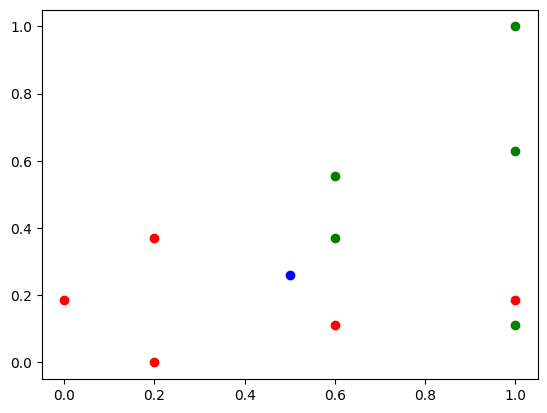

array([[0.50545719, 0.39650393, 0.17873968, 0.31991511, 0.50545719,
        0.62223325, 0.52148622, 0.14948471, 0.89369841, 0.31271632]])

In [114]:

scaled_employees = preprocessing.MinMaxScaler(feature_range=(0,1)).fit_transform(employees)

[
    plt.scatter(x[0], x[1], color='g' if x[2] > 0.5 else 'r')
    for x in scaled_employees
] + [plt.scatter(0.5, 0.25925925925925924, color='b')]

plt.show()


scaled_employee_features = scaled_employees.transpose()[:2].transpose()


from sklearn.metrics.pairwise import euclidean_distances

euclidean_distances(
    [[0.5, 0.25925925925925924]],
    scaled_employee_features
)

Exercise 13: k-nearest Neighbor Classification in scikit-learn


In [115]:
from sklearn import model_selection
import pandas as pd
import numpy as np
from sklearn import preprocessing


features_train, features_test, label_train, label_test = model_selection.train_test_split(
    scaled_features,
    label,
    test_size=0.2
)


from sklearn import neighbors

classifier = neighbors.KNeighborsClassifier()
classifier.fit(features_train, label_train)

classifier.score(features_test, label_test)

0.715

Exercise 14: Prediction with the k-nearest neighbors classifier

In [116]:

data_point = [None] * 20
for i in range(20):
    data_point[i] = features_test[i][i]
data_point = np.array(data_point)


data_point = data_point.reshape(1, -1)


credit_rating = classifier.predict(data_point)


classifier.predict(data_point)

array([1])

**Activity 7: Preparing Credit Data for Classification**

In [50]:
import pandas
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import neighbors
from sklearn import svm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

ACTIVITY 7: PREPARING CREDIT DATA FOR CLASSIFICATION

In [52]:
print("\nDownloading German credit data...")
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'

In [53]:
column_names = [
    'CheckingAccountStatus', 'DurationMonths', 'CreditHistory', 'CreditPurpose',
    'CreditAmount', 'SavingsAccount', 'EmploymentSince', 'DisposableIncomePercent',
    'PersonalStatusSex', 'OtherDebtors', 'PresentResidenceMonths', 'Property',
    'Age', 'OtherInstallmentPlans', 'Housing', 'NumberOfExistingCreditsInBank',
    'Job', 'LiabilityNumberOfPeople', 'Phone', 'ForeignWorker', 'CreditScore'
]

In [68]:
data_frame = pandas.read_csv(url, sep=' ', names=column_names)
data_frame.replace('NA', -1000000, inplace=True)

LABEL ENCODING

In [57]:
labels = {
    'CheckingAccountStatus': ['A11', 'A12', 'A13', 'A14'],
    'CreditHistory': ['A30', 'A31', 'A32', 'A33', 'A34'],
    'CreditPurpose': ['A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A410'],
    'SavingsAccount': ['A61', 'A62', 'A63', 'A64', 'A65'],
    'EmploymentSince': ['A71', 'A72', 'A73', 'A74', 'A75'],
    'PersonalStatusSex': ['A91', 'A92', 'A93', 'A94', 'A95'],
    'OtherDebtors': ['A101', 'A102', 'A103'],
    'Property': ['A121', 'A122', 'A123', 'A124'],
    'OtherInstallmentPlans': ['A141', 'A142', 'A143'],
    'Housing': ['A151', 'A152', 'A153'],
    'Job': ['A171', 'A172', 'A173', 'A174'],
    'Phone': ['A191', 'A192'],
    'ForeignWorker': ['A201', 'A202']
}

In [58]:
label_encoders = {}
data_frame_encoded = pandas.DataFrame()

for column in data_frame:
    if column in labels:
        label_encoders[column] = preprocessing.LabelEncoder()
        label_encoders[column].fit(labels[column])
        data_frame_encoded[column] = label_encoders[column].transform(data_frame[column])
    else:
        data_frame_encoded[column] = data_frame[column]

print("\nEncoded data (first 5 rows):")
print(data_frame_encoded.head())

print("\n\nLabel encoders created for the following columns:")
for key in label_encoders.keys():
    print(f"  - {key}")



Encoded data (first 5 rows):
   CheckingAccountStatus  DurationMonths  CreditHistory  CreditPurpose  \
0                      0               6              4              4   
1                      1              48              2              4   
2                      3              12              4              7   
3                      0              42              2              3   
4                      0              24              3              0   

   CreditAmount  SavingsAccount  EmploymentSince  DisposableIncomePercent  \
0          1169               4                4                        4   
1          5951               0                2                        2   
2          2096               0                3                        2   
3          7882               0                3                        2   
4          4870               0                2                        3   

   PersonalStatusSex  OtherDebtors  ...  Property  Age  OtherI

FEATURE EXTRACTION AND SCALING

In [63]:
features = np.array(data_frame_encoded.drop(['CreditScore'], axis=1))
label = np.array(data_frame_encoded['CreditScore'])

In [64]:
print(f"\nFeatures shape: {features.shape}")
print(f"Labels shape: {label.shape}")
print(f"Unique credit scores: {np.unique(label)}")


Features shape: (1000, 20)
Labels shape: (1000,)
Unique credit scores: [1 2]


In [65]:
scaled_features = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit_transform(features)

print("\nFeatures scaled to range [0, 1]")
print(f"Min value in scaled features: {scaled_features.min()}")
print(f"Max value in scaled features: {scaled_features.max()}")



Features scaled to range [0, 1]
Min value in scaled features: 0.0
Max value in scaled features: 1.0


TRAIN-TEST SPLIT 80% train, 20% test

In [66]:
features_train, features_test, label_train, label_test = model_selection.train_test_split(
    scaled_features,
    label,
    test_size=0.2,
    random_state=42
)


In [67]:
print(f"\nTraining set size: {features_train.shape[0]} samples")
print(f"Testing set size: {features_test.shape[0]} samples")
print(f"Training percentage: {(features_train.shape[0] / features.shape[0]) * 100:.1f}%")
print(f"Testing percentage: {(features_test.shape[0] / features.shape[0]) * 100:.1f}%")



Training set size: 800 samples
Testing set size: 200 samples
Training percentage: 80.0%
Testing percentage: 20.0%


**Activity 8: Increasing Accuracy**

k = 10

In [69]:
from sklearn import neighbors

classifier = neighbors.KNeighborsClassifier(n_neighbors=10)
classifier.fit(features_train, label_train)
classifier.score(features_test, label_test)

0.77

k = 15

In [77]:
classifier = neighbors.KNeighborsClassifier(n_neighbors=15)
classifier.fit(features_train, label_train)
print(f"K=15: {classifier.score(features_test, label_test)}")


K=15: 0.78


k = 25

In [78]:
classifier = neighbors.KNeighborsClassifier(n_neighbors=25)
classifier.fit(features_train, label_train)
print(f"K=25: {classifier.score(features_test, label_test)}")

K=25: 0.735


k = 50

In [79]:
classifier = neighbors.KNeighborsClassifier(n_neighbors=50)
classifier.fit(features_train, label_train)
print(f"K=50: {classifier.score(features_test, label_test)}")

K=50: 0.755


**Activity 9: Support Vector Machine Optimization in scikit-learn**

In [70]:
from sklearn import svm

**Linear kernel**

In [71]:
classifier = svm.SVC(kernel="linear")
classifier.fit(features_train, label_train)
classifier.score(features_test, label_test)

0.77

** Polynomial kernel (gamma=0.05)**

In [72]:
classifier = svm.SVC(kernel="poly", C=2, degree=4, gamma=0.05)
classifier.fit(features_train, label_train)
classifier.score(features_test, label_test)

0.705

**Polynomial kernel (gamma=0.25)**

In [73]:
classifier = svm.SVC(kernel="poly", C=2, degree=4, gamma=0.25)
classifier.fit(features_train, label_train)
classifier.score(features_test, label_test)

0.78

**Polynomial kernel (gamma=0.5)**

In [74]:
classifier = svm.SVC(kernel="poly", C=2, degree=4, gamma=0.5)
classifier.fit(features_train, label_train)
classifier.score(features_test, label_test)

0.73

**Sigmoid kernel**

In [75]:
classifier = svm.SVC(kernel="sigmoid")
classifier.fit(features_train, label_train)
classifier.score(features_test, label_test)

0.66

**RBF kernel (gamma=0.15)**

In [76]:
classifier = svm.SVC(kernel="rbf", gamma=0.15)
classifier.fit(features_train, label_train)
classifier.score(features_test, label_test)


0.775